## Graduates job outcomes visualization

In this project we will work on a visualization of the dataset containing the information on job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [2]:
print(recent_grads.describe())
raw_data_count = recent_grads.count() #Count number of rows
print("Number of rows in initial dataset:", raw_data_count[1])


             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

1. Dataset contains 21 column, most of which are float numbers. 
2. Some of the columns have missing values


We will drop the rows, which are containing the null values. This will allow us to use Matplotlib for visualizing data.

In [4]:
recent_grads = recent_grads.dropna() #Drop missing values to match column lengths
cleaned_data_count = recent_grads.count() 
print("Number of rows after dropping null values:", cleaned_data_count[1])

Number of rows after dropping null values: 172


Only 1 row was dropped, which is approximately 0.57% of full dataset.

## Pandas, Scatter Plots

We will plot several scatter plots to explore the following questions:

1. Do students in more popular majors make more money?
2. Do students that majored in subjects that were majority female make more money?
3. Is there any link between the number of full-time employees and median salary?

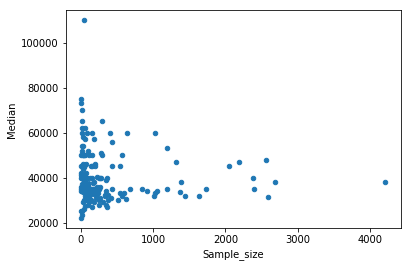

In [5]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

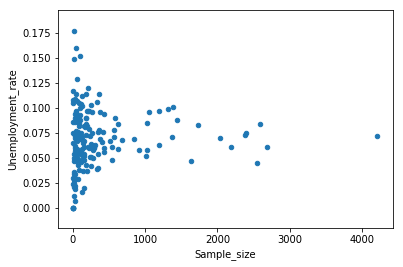

In [6]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

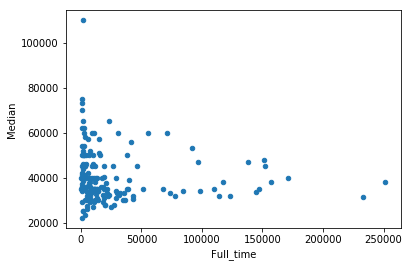

In [7]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

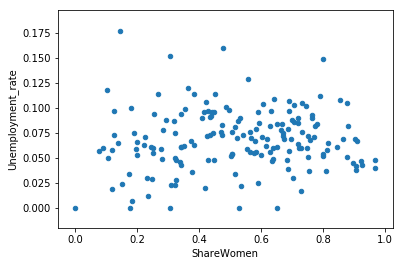

In [8]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

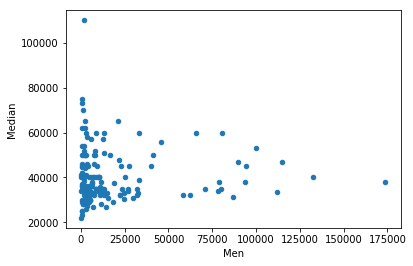

In [9]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

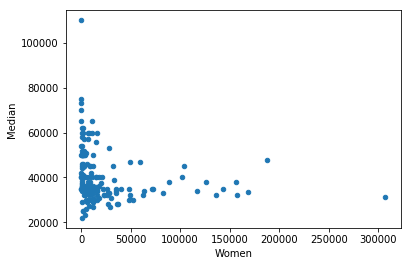

In [10]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

As you may have noticed, sometimes it is hard to give an exact answer only with the visualizations. But it is still possible to extract some information from them.

1. No, most of the jobs with income, which is higher than the mean value for *Median* column (~40000\$) are represented by small sample sizes of less than 1000 i.e. they are grouped in the top-left part of the plot.
2. No, if we will compare the Median salary of Majors with high percent of female graduates it is below the 40000\$
3. As we increase the amount of full-time employees the *spread* of median salary is decreasing and approaches a mean value.

## Pandas, Histograms

We will plot several histograms to explore the following questions:
1. What percent of majors are predominantly male? Predominantly female?
2. What's the most common median salary range?

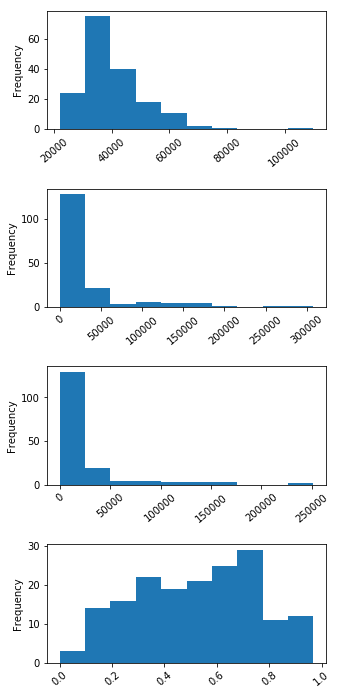

In [19]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
fig.subplots_adjust(hspace = 0.5) #adjust the distance between the plots

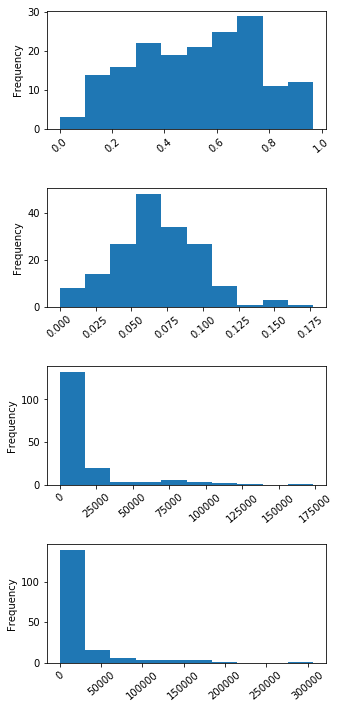

In [21]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
fig.subplots_adjust(hspace = 0.5)

1. There are approximately 20 majors out of 172 in which there were less than 20% of women and 25 majors with more than 80% of women. This gives around 10% of majors which are predominantly female or male.  
2. The most common median salary range is below 25000\$ (more than 125 majors out of 172)

## Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212027ABEF0>,
      dtype=object)

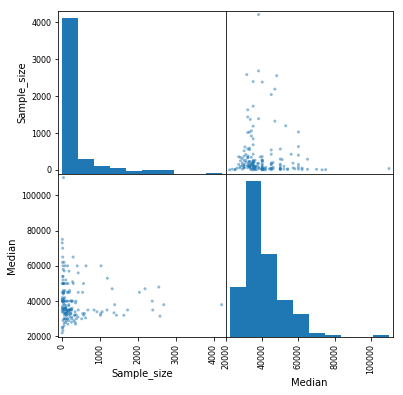

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021202B5C198>,
      dtype=object)

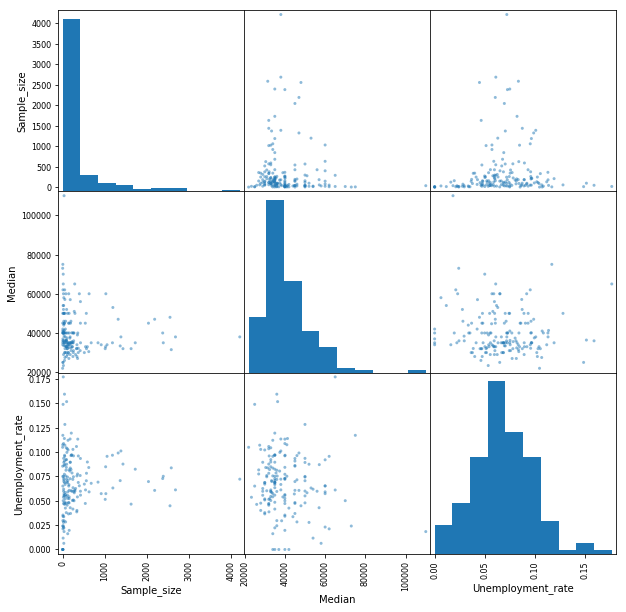

In [23]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Pandas, Bar Plots

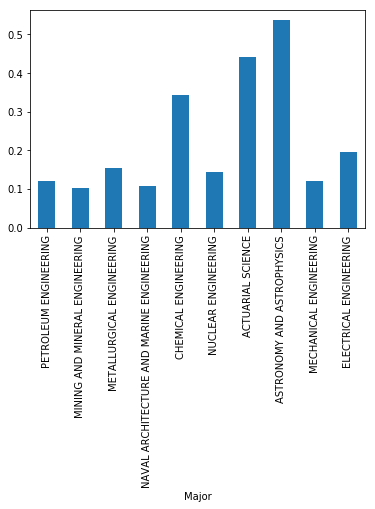

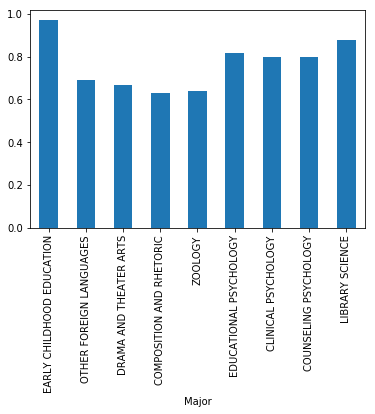

In [24]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)